# Comparison of models for Like using two different limits for the parameters

## Import components

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(title, fontsize=25)
    sns.despine()

In [3]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel,titleVar = ''):

    f = plt.figure(figsize=(10, 10))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    
    
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 30,
        }
    plt.title(titleVar,fontdict=font)
    plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    
   # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
   # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    

    plt.show()


# No inversion condition in Dislike
--------------------------------------------------------------------


# Load parameters for both conditions

In [4]:
# Load params from DISLIKE  model (using inverted input [3-value])
Dislike_sufix = '_Like_NoBin_Gamma_01_NUTS_31'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_FF2019_full_individual'+Dislike_sufix+'.npy'))   

# Load params from LIKE  model
Like_sufix = '_Like_NoBin_Gamma-11_NUTS_31'
glam_full_like_estimates = np.load(str('results/estimates/glam_FF2019_full_individual'+Like_sufix+'.npy'))   

In [5]:
params_part_like = pd.DataFrame(glam_full_like_estimates.item(0))
params_part_dislike = pd.DataFrame(glam_full_dislike_estimates.item(0))


for i in range(1,len(glam_full_like_estimates)):

    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates[i])
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates[i])

    frames = [params_part_like, params_part_like1]
    params_part_like = pd.concat(frames)
    params_part_like = params_part_like.reset_index(drop=True) 
    
    frames = [params_part_dislike, params_part_dislike1]
    params_part_dislike = pd.concat(frames)
    params_part_dislike = params_part_dislike.reset_index(drop=True) 
    
#params_part_like = params_part_like.reset_index() 
#param s_part_dislike = params_part_dislike.reset_index()
    

In [6]:
params_part_like

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000044,0.01,179.94,0.007742,4.77,0.0
1,1.0,0.05,0.000075,0.80,44.31,0.005750,0.56,0.0
2,1.0,0.05,0.000057,0.14,107.97,0.008394,1.87,0.0
3,1.0,0.05,0.000042,-0.05,174.89,0.007141,4.70,0.0
4,1.0,0.05,0.000091,0.05,73.46,0.006764,2.34,0.0
5,1.0,0.05,0.000064,0.38,107.44,0.007028,1.45,0.0
6,1.0,0.05,0.000077,0.01,116.09,0.009647,2.22,0.0
7,1.0,0.05,0.000043,0.07,152.56,0.007672,1.60,0.0
8,1.0,0.05,0.000055,-0.88,174.54,0.009078,1.04,0.0
9,1.0,0.05,0.000046,0.25,170.19,0.008060,4.81,0.0


## Parameters Like

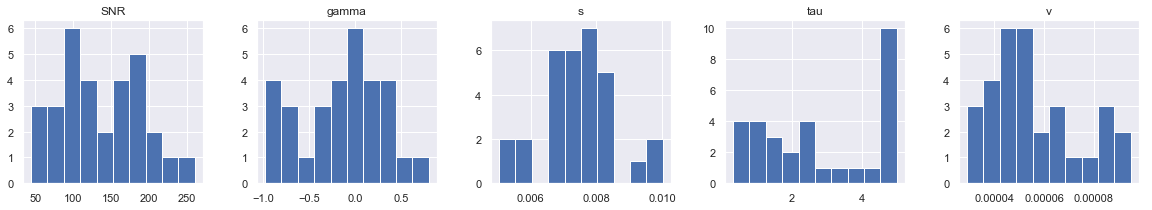

In [7]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

## Parameters Dislike

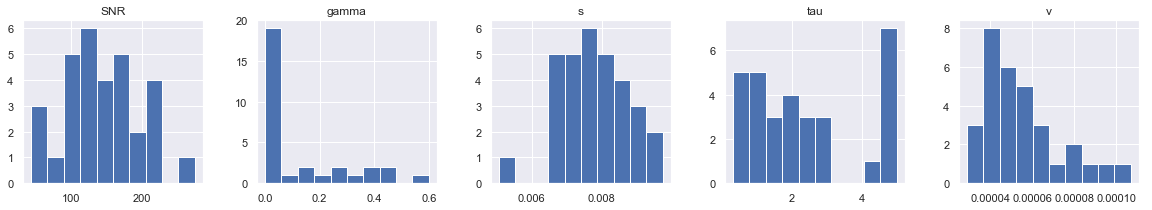

In [8]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

In [9]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [10]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [11]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  -8.235483870967784 ; p-value =0.25203715159784434
Gamma: [Like - Dislike] =  -0.2670967741935483 ; p-value =0.0007109355977748383
Tau: [Like - Dislike] =  0.40161290322580623 ; p-value =0.09765081412794085
V: [Like - Dislike] =  7.741935483870848e-07 ; p-value =0.5872689860155813
S: [Like - Dislike] =  -0.0003269354838709663 ; p-value =0.05248804471276649


MeanL = -0.14; MeanD = 0.13; [Like - Dislike] =  -0.27; t =  -3.77 ; p-value =0.0
MeanL = 2.81; MeanD = 2.41; [Like - Dislike] =  0.4; t =  1.71 ; p-value =0.1
MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  0.0; t =  0.55 ; p-value =0.59
MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  -0.0; t =  -2.02 ; p-value =0.05


(0.004, 0.012)

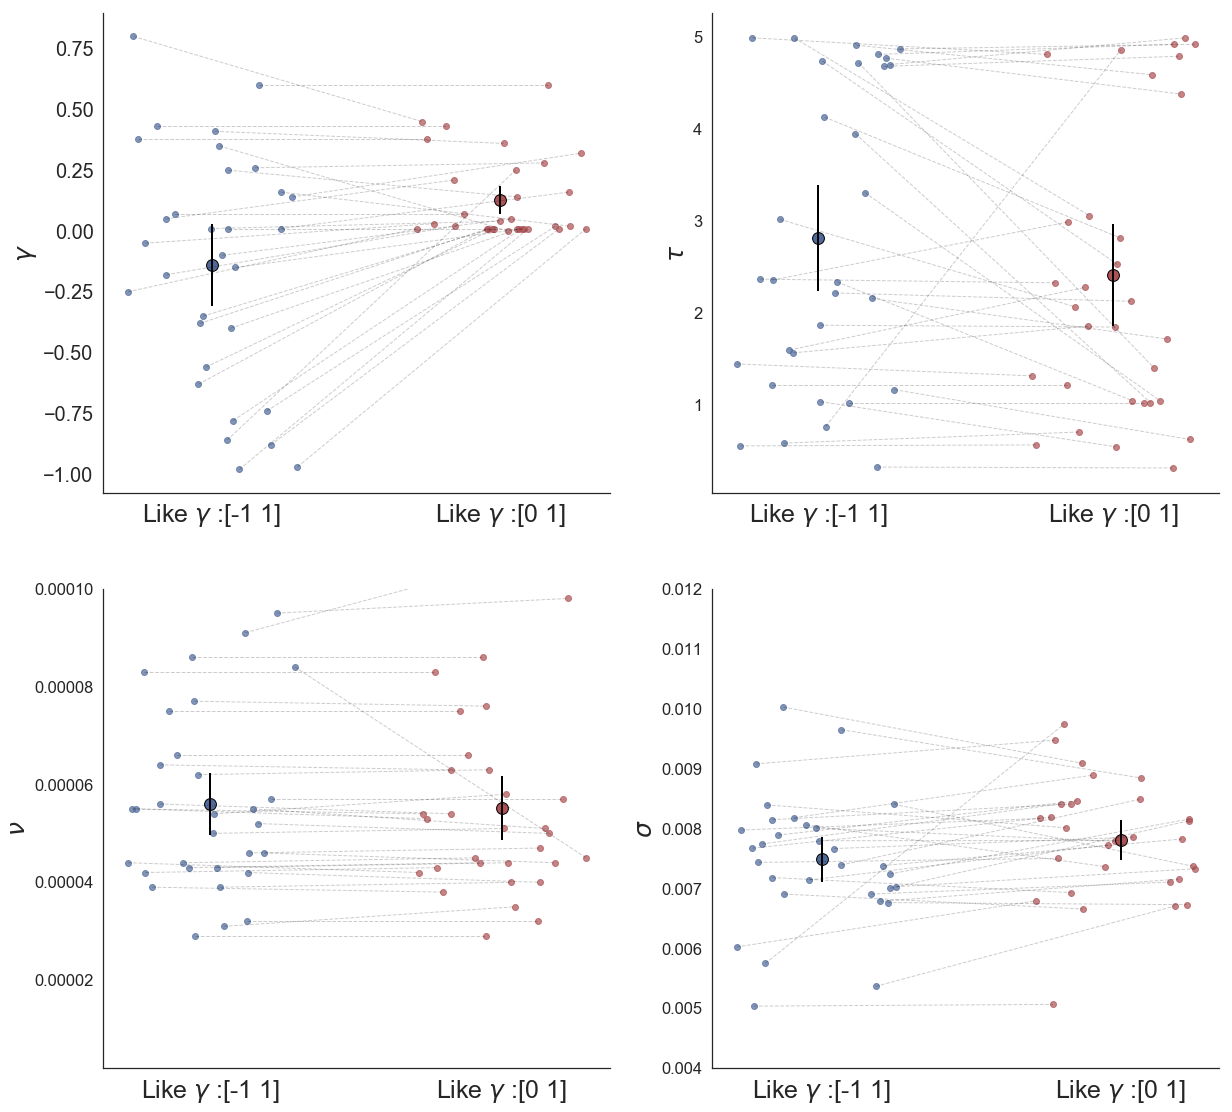

In [12]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = '$\gamma$')
plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = r'$\tau$')
plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = '$\sigma$')
plt.ylim(0.004,0.012 )

Pearson's r = 0.657 p =  0.0


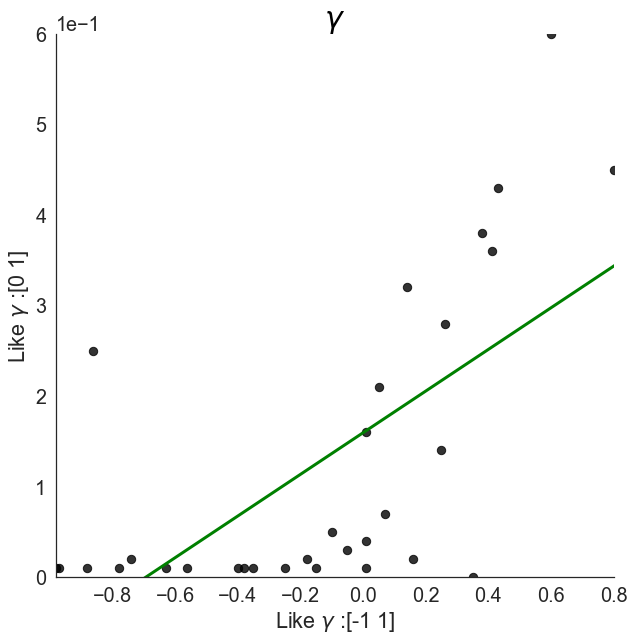

In [13]:
LD_Gamma =  pd.DataFrame()
LD_Gamma['Dislike'] =  params_part_dislike.gamma
LD_Gamma['Like'] =   params_part_like.gamma
correl_plot(LD_Gamma,'Like', 'Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]', r'$\gamma$')



Pearson's r = 0.677 p =  0.0


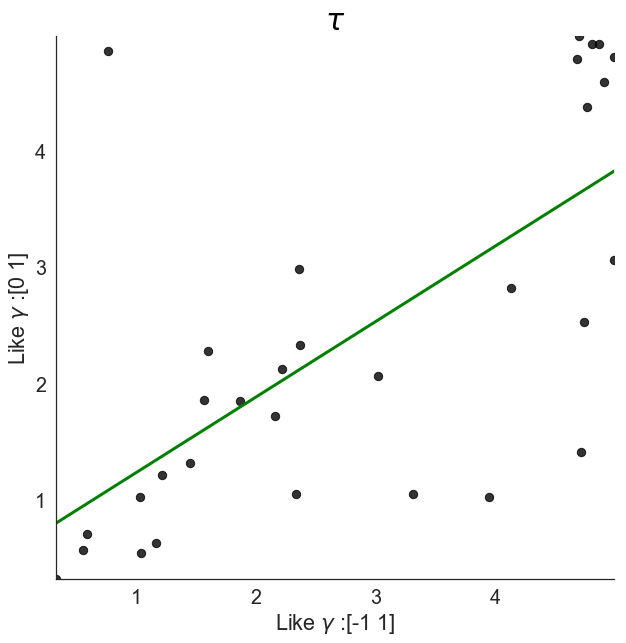

In [14]:
LD_Tau =  pd.DataFrame()
LD_Tau['Dislike'] =  params_part_dislike.tau
LD_Tau['Like'] =  params_part_like.tau
correl_plot(LD_Tau,'Like', 'Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]', r'$\tau$')

Pearson's r = 0.617 p =  0.0


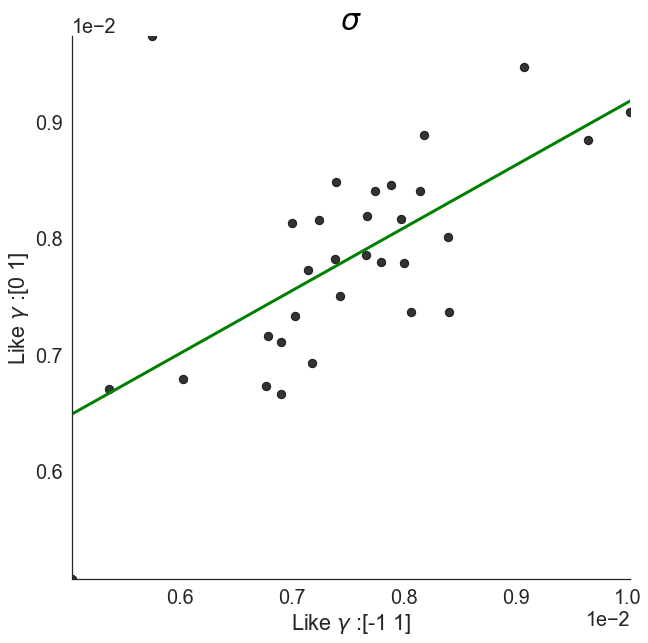

In [15]:
LD_S =  pd.DataFrame()
LD_S['Dislike'] =  params_part_dislike.s
LD_S['Like'] =  params_part_like.s
correl_plot(LD_S,'Like', 'Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]', r'$\sigma$')

Pearson's r = 0.911 p =  0.0


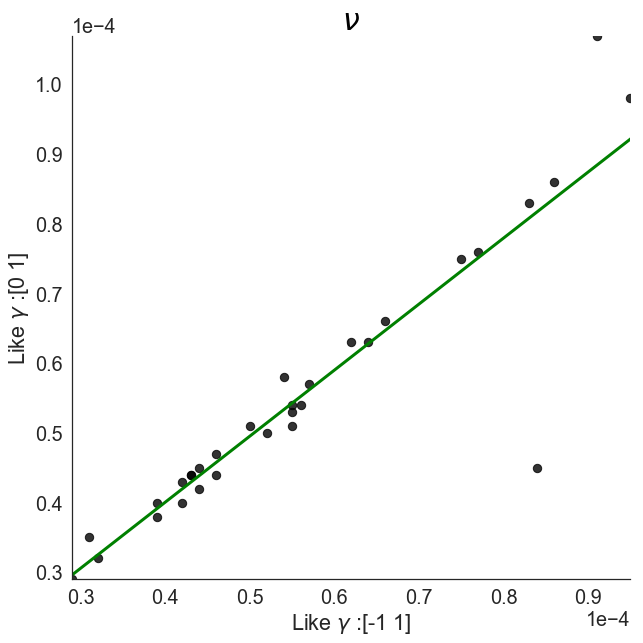

In [16]:
LD_V =  pd.DataFrame()
LD_V['Dislike'] =  params_part_dislike.v
LD_V['Like'] =  params_part_like.v
correl_plot(LD_V,'Like','Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]',r'$\nu$')

# The same but for Dislike
--------------------------------------------------------

# Load parameters for both conditions

In [17]:
# Load params from DISLIKE individual model
Dislike_sufix = '_Dislike_Inv_NoBin_Gamma_01_NUTS_31'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_FF2019_full_individual'+Dislike_sufix+'.npy'))   

# Load params from LIKE individual model
Like_sufix = '_Dislike_Inv_NoBin_Gamma-11_NUTS_31'
glam_full_like_estimates = np.load(str('results/estimates/glam_FF2019_full_individual'+Like_sufix+'.npy'))   

In [18]:
len(glam_full_dislike_estimates)

31

In [19]:
params_part_like = pd.DataFrame(glam_full_like_estimates.item(0))
params_part_dislike = pd.DataFrame(glam_full_dislike_estimates.item(0))


for i in range(1,len(glam_full_like_estimates)):

    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates[i])
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates[i])

    frames = [params_part_like, params_part_like1]
    params_part_like = pd.concat(frames)
    params_part_like = params_part_like.reset_index(drop=True) 
    
    frames = [params_part_dislike, params_part_dislike1]
    params_part_dislike = pd.concat(frames)
    params_part_dislike = params_part_dislike.reset_index(drop=True) 
    
#params_part_like = params_part_like.reset_index() 
#param s_part_dislike = params_part_dislike.reset_index()
    

In [20]:
params_part_like

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000037,0.62,180.28,0.006407,3.56,0.0
1,1.0,0.05,0.000049,0.43,37.53,0.004241,0.45,0.0
2,1.0,0.05,0.000044,0.99,146.71,0.007717,0.80,0.0
3,1.0,0.05,0.000036,0.16,183.63,0.007155,3.00,0.0
4,1.0,0.05,0.000048,0.36,214.51,0.009292,4.92,0.0
5,1.0,0.05,0.000045,0.29,210.12,0.008504,4.76,0.0
6,1.0,0.05,0.000063,0.27,132.99,0.008919,1.27,0.0
7,1.0,0.05,0.000042,-0.06,139.13,0.006858,4.19,0.0
8,1.0,0.05,0.000047,-0.98,167.29,0.008069,2.58,0.0
9,1.0,0.05,0.000052,-0.69,122.06,0.006391,4.85,0.0


In [21]:
params_part_like = pd.DataFrame(glam_full_like_estimates.item(0))
params_part_dislike = pd.DataFrame(glam_full_dislike_estimates.item(0))


for i in range(1,len(glam_full_like_estimates)):

    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates[i])
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates[i])

    frames = [params_part_like, params_part_like1]
    params_part_like = pd.concat(frames)
    params_part_like = params_part_like.reset_index(drop=True) 
    
    frames = [params_part_dislike, params_part_dislike1]
    params_part_dislike = pd.concat(frames)
    params_part_dislike = params_part_dislike.reset_index(drop=True) 
    
#params_part_like = params_part_like.reset_index() 
#param s_part_dislike = params_part_dislike.reset_index()
    

## Parameters Like

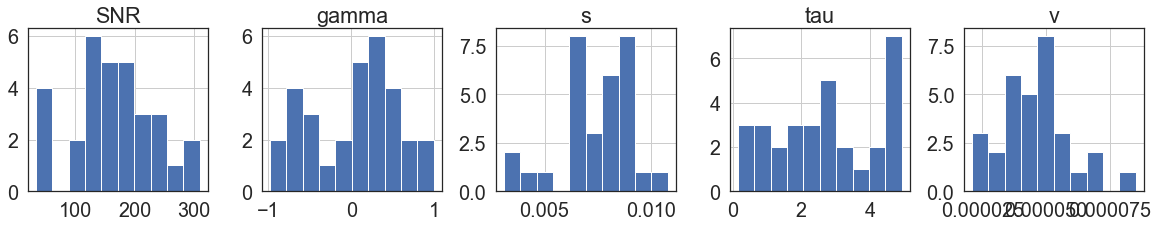

In [22]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

## Parameters Dislike

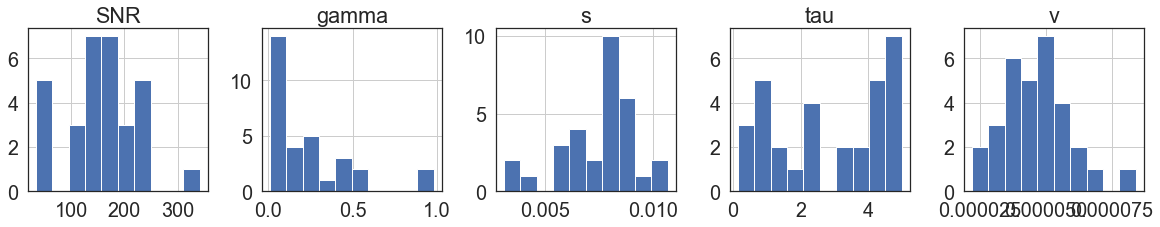

In [23]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

In [24]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [25]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [26]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )
print ("V: Like : " + str(mean(params_part_like.v)) + " ; Dislike =" + str(mean(params_part_dislike.v)) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  8.16709677419351 ; p-value =0.12385418759153685
Gamma: [Like - Dislike] =  -0.19612903225806447 ; p-value =0.0038675079123193846
Tau: [Like - Dislike] =  -0.13999999999999924 ; p-value =0.3208861488914985
V: [Like - Dislike] =  -1.9354838709678305e-07 ; p-value =0.8496456227794917
V: Like : 4.535483870967742e-05 ; Dislike =4.55483870967742e-05
S: [Like - Dislike] =  -0.0001022903225806459 ; p-value =0.34086381687998424


In [27]:
def add_star(list1,list2):
    x1, x2 = 1, 2   
    y_max = max([list1.max(),list2.max()])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)


MeanL = 0.03; MeanD = 0.22; [Like - Dislike] =  -0.2; t =  -3.13 ; p-value =0.0
MeanL = 2.7; MeanD = 2.84; [Like - Dislike] =  -0.14; t =  -1.01 ; p-value =0.32
MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  -0.0; t =  -0.19 ; p-value =0.85
MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  -0.0; t =  -0.97 ; p-value =0.34


(0.004, 0.012)

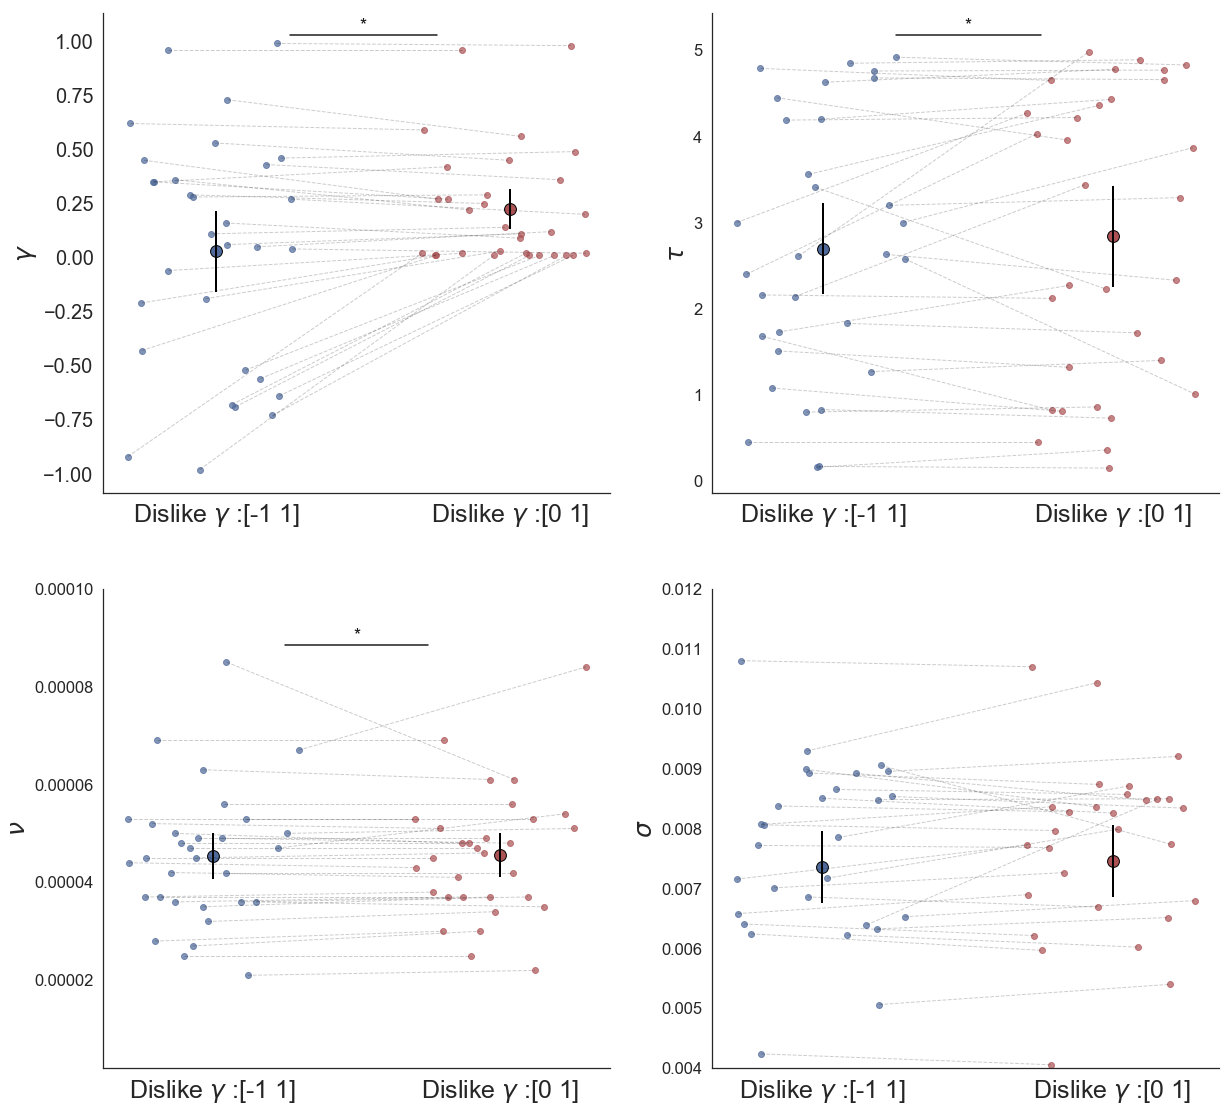

In [28]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]',  'Dislike '+ r'$\gamma$' + ' :[0 1]',title = '$\gamma$')
add_star(params_part_like.gamma,params_part_dislike.gamma)

plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]', 'Dislike '+ r'$\gamma$' + ' :[0 1]',title = r'$\tau$')
add_star(params_part_like.tau,params_part_dislike.tau)

plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]', 'Dislike '+ r'$\gamma$' + ' :[0 1]',title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
add_star(params_part_like.v,params_part_dislike.v)

plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]',  'Dislike '+ r'$\gamma$' + ' :[0 1]',title = '$\sigma$')
plt.ylim(0.004,0.012 )

Pearson's r = 0.842 p =  0.0


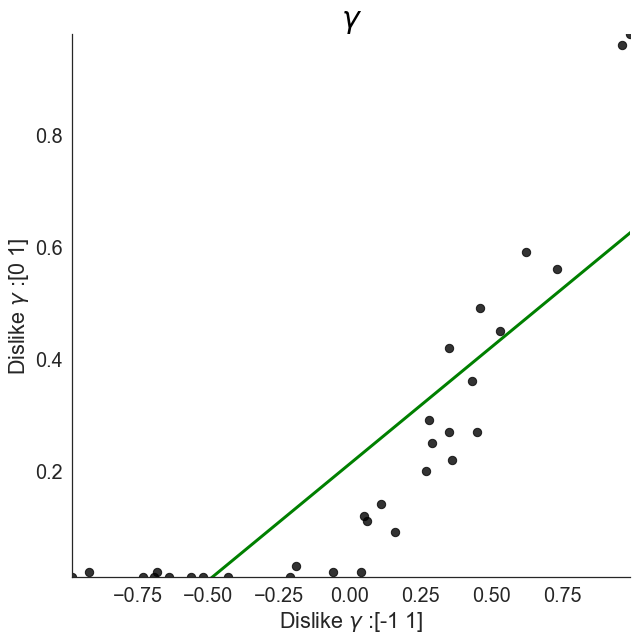

In [29]:
LD_Gamma =  pd.DataFrame()
LD_Gamma['Dislike'] =  params_part_dislike.gamma
LD_Gamma['Like'] =  params_part_like.gamma
correl_plot(LD_Gamma,'Like', 'Dislike '+ r'$\gamma$' + ' :[-1 1]','Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\gamma$')

Pearson's r = 0.89 p =  0.0


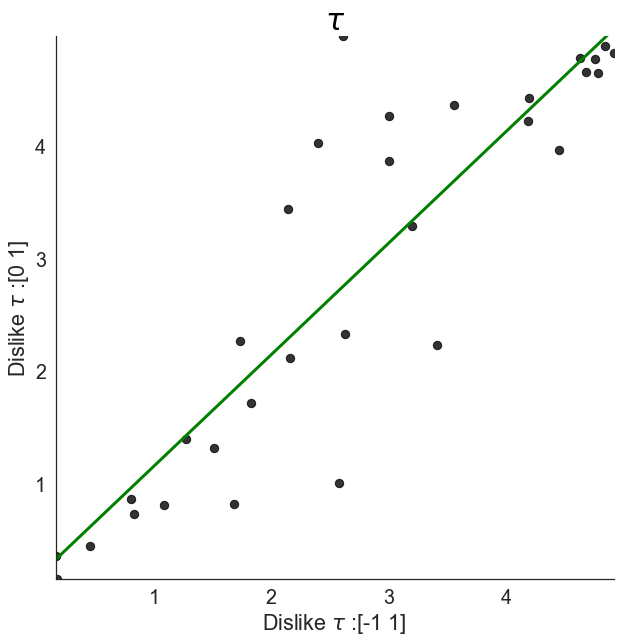

In [30]:
LD_Tau =  pd.DataFrame()
LD_Tau['Dislike'] =  params_part_dislike.tau
LD_Tau['Like'] =  params_part_like.tau
correl_plot(LD_Tau,'Like','Dislike '+ r'$\tau$' + ' :[-1 1]','Dislike','Dislike '+ r'$\tau$' + ' :[0 1]',r'$\tau$')

Pearson's r = 0.943 p =  0.0


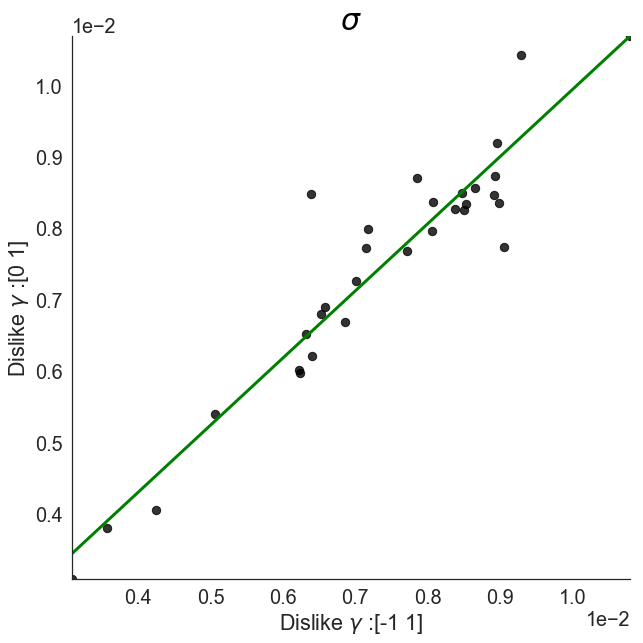

In [31]:
LD_S =  pd.DataFrame()
LD_S['Dislike'] =  params_part_dislike.s
LD_S['Like'] =  params_part_like.s
correl_plot(LD_S,'Like', 'Dislike '+ r'$\gamma$' + ' :[-1 1]','Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\sigma$')

Pearson's r = 0.912 p =  0.0


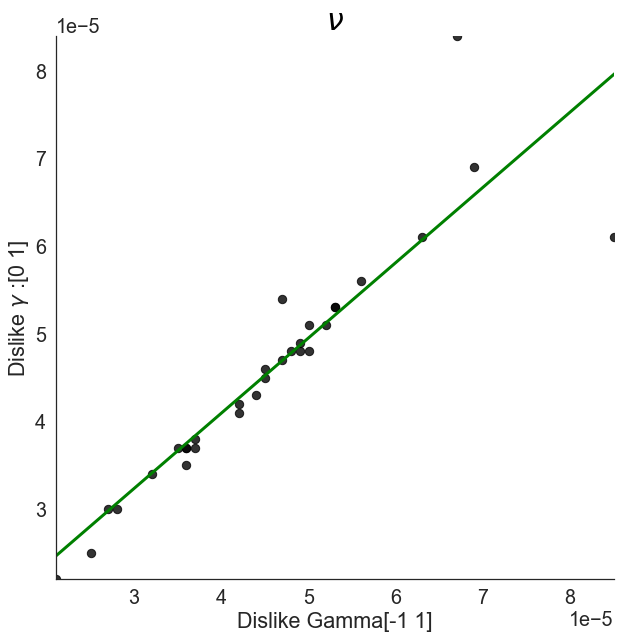

In [32]:
LD_V =  pd.DataFrame()
LD_V['Dislike'] =  params_part_dislike.v
LD_V['Like'] =  params_part_like.v
correl_plot(LD_V,'Like', "Dislike Gamma[-1 1]",'Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\nu$')

## **Except for Gamma the other parameters matain their order across participants**